# Quantum jump method for a two-fluorophore system

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from scipy.special import jv

### Pointspread function

In [2]:
def pointspread(x): #Point spread function
    NA=1.4 #Apertura numérica   
    M=1 #Aumento
    eps0=1 #Constante dieléctrica del vacío
    n=1 #Índice de refracción
    lamda=1 #Longitud de onda
    mu=1 #Momento dipolar
    z=2*np.pi*NA*x/(M*lamda) #Argumento de la función 
    MAX=np.pi**4*mu**2*NA**4/(eps0**2*n**2*lamda**6*M**2)*\
         (2*jv(1,0.0000001)/0.0000001)**2
    return np.pi**4*mu**2*NA**4/(eps0**2*n**2*lamda**6*M**2)*(2*jv(1,z)/z)**2/MAX/3
    #He puesto el factor de normalización "MAX" al cuadrado para que la PSF
    #sea mucho menor que 1

## Set parameters and operators

In [3]:
N=2
a=destroy(N)
c1=tensor(a,qeye(N),qeye(N))
c2=tensor(qeye(N),a,qeye(N))
c3=tensor(qeye(N),qeye(N),a)

dt=0.01
t0=0
tf=10
nt=int((tf-t0)/dt)

delta1=1
delta2=1
delta3=1
gamma1=1
gamma2=1
gamma3=1
p1=1
p2=1

x1=0.2
x2=-0.2
nx3=100
x3=np.linspace(-2,2,nx3)

## Hamiltonian and collapse operators

In [5]:
H=delta1*c1.dag()*c1+delta2*c2.dag()*c2+delta3*c3.dag()*c3
               
c_ops=[]
c_ops.append(np.sqrt(gamma1)*c1)
c_ops.append(np.sqrt(gamma2)*c2)
c_ops.append(np.sqrt(gamma3)*c3)
c_ops.append(np.sqrt(p1)*c1.dag())
c_ops.append(np.sqrt(p2)*c2.dag())


## Monte Carlo method

In [6]:
psi0=tensor(basis(N,0),basis(N,0),basis(N,0))
ntraj=500
tlist=np.linspace(t0,tf,nt)
mc_out=[]
me_out=[]
""""out=[]
out.append(c1*c1.dag())
out.append(c1.dag()*c1)
out.append(c2*c2.dag())
out.append(c2.dag()*c2)
out.append(c3*c3.dag())
out.append(c3.dag()*c3)"""
for i in range(0,nx3):
    c_ops.append(np.sqrt(np.sqrt(gamma1*gamma3*pointspread(x3[i]-x1)))*(c1+c3))
    c_ops.append(np.sqrt(np.sqrt(gamma2*gamma3*pointspread(x3[i]-x2)))*(c2+c3))

    mc=mcsolve(H,psi0,tlist,c_ops,c3.dag()*c3,ntraj)
    me=mesolve(H,psi0,tlist,c_ops,c3.dag()*c3)
    
    mc_out.append(mc.expect[0][nt-1])
    me_out.append(me.expect[0][nt-1])
    
    c_ops.pop()
    c_ops.pop()

10.0%. Run time:   4.55s. Est. time left: 00:00:00:40
20.0%. Run time:   5.16s. Est. time left: 00:00:00:20
30.0%. Run time:   5.75s. Est. time left: 00:00:00:13
40.0%. Run time:   6.36s. Est. time left: 00:00:00:09
50.0%. Run time:   6.98s. Est. time left: 00:00:00:06
60.0%. Run time:   7.55s. Est. time left: 00:00:00:05
70.0%. Run time:   8.17s. Est. time left: 00:00:00:03
80.0%. Run time:   8.75s. Est. time left: 00:00:00:02
90.0%. Run time:   9.39s. Est. time left: 00:00:00:01
100.0%. Run time:   9.99s. Est. time left: 00:00:00:00
Total run time:  10.04s
10.0%. Run time:   3.74s. Est. time left: 00:00:00:33
20.0%. Run time:   4.32s. Est. time left: 00:00:00:17
30.0%. Run time:   4.88s. Est. time left: 00:00:00:11
40.0%. Run time:   5.46s. Est. time left: 00:00:00:08
50.0%. Run time:   6.03s. Est. time left: 00:00:00:06
60.0%. Run time:   6.60s. Est. time left: 00:00:00:04
70.0%. Run time:   7.18s. Est. time left: 00:00:00:03
80.0%. Run time:   7.73s. Est. time left: 00:00:00:01
90.

70.0%. Run time:   8.82s. Est. time left: 00:00:00:03
80.0%. Run time:   9.51s. Est. time left: 00:00:00:02
90.0%. Run time:  10.16s. Est. time left: 00:00:00:01
100.0%. Run time:  10.86s. Est. time left: 00:00:00:00
Total run time:  10.91s
10.0%. Run time:   3.93s. Est. time left: 00:00:00:35
20.0%. Run time:   4.55s. Est. time left: 00:00:00:18
30.0%. Run time:   5.18s. Est. time left: 00:00:00:12
40.0%. Run time:   5.79s. Est. time left: 00:00:00:08
50.0%. Run time:   6.41s. Est. time left: 00:00:00:06
60.0%. Run time:   7.01s. Est. time left: 00:00:00:04
70.0%. Run time:   7.63s. Est. time left: 00:00:00:03
80.0%. Run time:   8.25s. Est. time left: 00:00:00:02
90.0%. Run time:   8.86s. Est. time left: 00:00:00:00
100.0%. Run time:   9.47s. Est. time left: 00:00:00:00
Total run time:   9.55s
10.0%. Run time:   3.81s. Est. time left: 00:00:00:34
20.0%. Run time:   4.39s. Est. time left: 00:00:00:17
30.0%. Run time:   5.00s. Est. time left: 00:00:00:11
40.0%. Run time:   5.61s. Est. t

20.0%. Run time:   4.50s. Est. time left: 00:00:00:17
30.0%. Run time:   5.10s. Est. time left: 00:00:00:11
40.0%. Run time:   5.72s. Est. time left: 00:00:00:08
50.0%. Run time:   6.35s. Est. time left: 00:00:00:06
60.0%. Run time:   6.97s. Est. time left: 00:00:00:04
70.0%. Run time:   7.57s. Est. time left: 00:00:00:03
80.0%. Run time:   8.20s. Est. time left: 00:00:00:02
90.0%. Run time:   8.85s. Est. time left: 00:00:00:00
100.0%. Run time:   9.45s. Est. time left: 00:00:00:00
Total run time:   9.52s
10.0%. Run time:   3.85s. Est. time left: 00:00:00:34
20.0%. Run time:   4.48s. Est. time left: 00:00:00:17
30.0%. Run time:   5.10s. Est. time left: 00:00:00:11
40.0%. Run time:   5.72s. Est. time left: 00:00:00:08
50.0%. Run time:   6.32s. Est. time left: 00:00:00:06
60.0%. Run time:   6.93s. Est. time left: 00:00:00:04
70.0%. Run time:   7.55s. Est. time left: 00:00:00:03
80.0%. Run time:   8.17s. Est. time left: 00:00:00:02
90.0%. Run time:   8.80s. Est. time left: 00:00:00:00
100

80.0%. Run time:   8.30s. Est. time left: 00:00:00:02
90.0%. Run time:   8.95s. Est. time left: 00:00:00:00
100.0%. Run time:   9.56s. Est. time left: 00:00:00:00
Total run time:   9.62s
10.0%. Run time:   3.87s. Est. time left: 00:00:00:34
20.0%. Run time:   4.48s. Est. time left: 00:00:00:17
30.0%. Run time:   5.10s. Est. time left: 00:00:00:11
40.0%. Run time:   5.75s. Est. time left: 00:00:00:08
50.0%. Run time:   6.35s. Est. time left: 00:00:00:06
60.0%. Run time:   6.97s. Est. time left: 00:00:00:04
70.0%. Run time:   7.58s. Est. time left: 00:00:00:03
80.0%. Run time:   8.21s. Est. time left: 00:00:00:02
90.0%. Run time:   8.85s. Est. time left: 00:00:00:00
100.0%. Run time:   9.48s. Est. time left: 00:00:00:00
Total run time:   9.53s
10.0%. Run time:   3.85s. Est. time left: 00:00:00:34
20.0%. Run time:   4.47s. Est. time left: 00:00:00:17
30.0%. Run time:   5.10s. Est. time left: 00:00:00:11
40.0%. Run time:   5.72s. Est. time left: 00:00:00:08
50.0%. Run time:   6.36s. Est. t

30.0%. Run time:   5.05s. Est. time left: 00:00:00:11
40.0%. Run time:   5.66s. Est. time left: 00:00:00:08
50.0%. Run time:   6.30s. Est. time left: 00:00:00:06
60.0%. Run time:   6.93s. Est. time left: 00:00:00:04
70.0%. Run time:   7.55s. Est. time left: 00:00:00:03
80.0%. Run time:   8.16s. Est. time left: 00:00:00:02
90.0%. Run time:   8.79s. Est. time left: 00:00:00:00
100.0%. Run time:   9.41s. Est. time left: 00:00:00:00
Total run time:   9.48s
10.0%. Run time:   3.81s. Est. time left: 00:00:00:34
20.0%. Run time:   4.42s. Est. time left: 00:00:00:17
30.0%. Run time:   5.06s. Est. time left: 00:00:00:11
40.0%. Run time:   5.71s. Est. time left: 00:00:00:08
50.0%. Run time:   6.31s. Est. time left: 00:00:00:06
60.0%. Run time:   6.93s. Est. time left: 00:00:00:04
70.0%. Run time:   7.56s. Est. time left: 00:00:00:03
80.0%. Run time:   8.18s. Est. time left: 00:00:00:02
90.0%. Run time:   8.81s. Est. time left: 00:00:00:00
100.0%. Run time:   9.43s. Est. time left: 00:00:00:00
To

90.0%. Run time:   8.72s. Est. time left: 00:00:00:00
100.0%. Run time:   9.33s. Est. time left: 00:00:00:00
Total run time:   9.38s
10.0%. Run time:   3.76s. Est. time left: 00:00:00:33
20.0%. Run time:   4.40s. Est. time left: 00:00:00:17
30.0%. Run time:   5.00s. Est. time left: 00:00:00:11
40.0%. Run time:   5.60s. Est. time left: 00:00:00:08
50.0%. Run time:   6.22s. Est. time left: 00:00:00:06
60.0%. Run time:   6.85s. Est. time left: 00:00:00:04
70.0%. Run time:   7.43s. Est. time left: 00:00:00:03
80.0%. Run time:   8.08s. Est. time left: 00:00:00:02
90.0%. Run time:   8.68s. Est. time left: 00:00:00:00
100.0%. Run time:   9.27s. Est. time left: 00:00:00:00
Total run time:   9.32s
10.0%. Run time:   3.78s. Est. time left: 00:00:00:33
20.0%. Run time:   4.41s. Est. time left: 00:00:00:17
30.0%. Run time:   5.02s. Est. time left: 00:00:00:11
40.0%. Run time:   5.65s. Est. time left: 00:00:00:08
50.0%. Run time:   6.28s. Est. time left: 00:00:00:06
60.0%. Run time:   6.93s. Est. t

40.0%. Run time:   6.51s. Est. time left: 00:00:00:09
50.0%. Run time:   7.27s. Est. time left: 00:00:00:07
60.0%. Run time:   8.01s. Est. time left: 00:00:00:05
70.0%. Run time:   8.71s. Est. time left: 00:00:00:03
80.0%. Run time:   9.66s. Est. time left: 00:00:00:02
90.0%. Run time:  10.30s. Est. time left: 00:00:00:01
100.0%. Run time:  11.13s. Est. time left: 00:00:00:00
Total run time:  11.24s
10.0%. Run time:   4.39s. Est. time left: 00:00:00:39
20.0%. Run time:   5.09s. Est. time left: 00:00:00:20
30.0%. Run time:   5.72s. Est. time left: 00:00:00:13
40.0%. Run time:   6.44s. Est. time left: 00:00:00:09
50.0%. Run time:   7.12s. Est. time left: 00:00:00:07
60.0%. Run time:   7.73s. Est. time left: 00:00:00:05
70.0%. Run time:   8.36s. Est. time left: 00:00:00:03
80.0%. Run time:   9.01s. Est. time left: 00:00:00:02
90.0%. Run time:   9.65s. Est. time left: 00:00:00:01
100.0%. Run time:  10.28s. Est. time left: 00:00:00:00
Total run time:  10.33s
10.0%. Run time:   3.87s. Est. t

## Plotting results

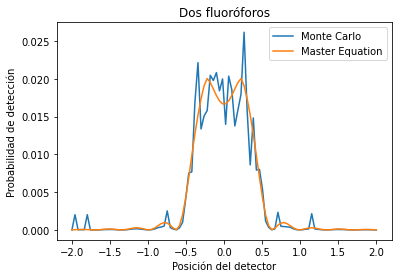

In [7]:
plt.plot(x3,mc_out,label="Monte Carlo")
plt.plot(x3,me_out,label="Master Equation")
plt.xlabel("Posición del detector")
plt.ylabel("Probabilidad de detección")
plt.title("Dos fluoróforos")
plt.legend()
plt.show()